# Load Packages

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Data Preperation

In [2]:
#add english caterogty to items table

items_df = pd.read_csv('olist_products_dataset.csv')

items_df.drop(['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

trans_df = pd.read_csv('product_category_name_translation.csv')


items_df = pd.merge(items_df, 
                      trans_df, 
                      on ='product_category_name', 
                      how ='inner')
items_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery


In [3]:
orders_df = pd.read_csv('olist_order_items_dataset.csv')
orders_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [4]:
#get only unique items in each order
orders = orders_df.groupby('order_id')['product_id'].unique()

In [5]:
#create edges between procuts in the same order
# create a 2d array [['node1','node2']] with duplicates


prodcut_edges = []

for order in orders:
    if len(order) > 1: 
        for i in range(len(order)):
            for j in range(i+1, len(order)):
                if order[i] != order[j]:
                    prodcut_edges.append([order[i], order[j]])
            
print(len(prodcut_edges))

4481


In [6]:
# Count duplicates deges and add wieghts

edge_with_wieght = []
dict1= {}

set_prodcut_edges = list(set(map(tuple,prodcut_edges)))

for _set in set_prodcut_edges:
    dict1[_set] = 1

for edge1 in prodcut_edges:
    for edge2 in prodcut_edges:
        reg = edge1[0] == edge2[0] and edge1[1] == edge2[1]
        not_reg = edge1[0] == edge2[1] and edge1[1] == edge2[0]
        if reg or not_reg:
            dict1[(edge1[0], edge1[1])] +=1
        
print(dict1)    

{('b1acb7e8152c90c9619897753a75c973', '2b4609f8948be18874494203496bc318'): 3, ('a04f52ded97b5530e8783e3c002b90f0', 'b8fefc9c1f951969968e904d08bfa8cd'): 2, ('71b157e39523e25558ed9cc1960c3fbd', '02ed3b595447e948efc3eac897e4df0e'): 2, ('338a394da06eb5deff048f151d13151e', '2f08de199f389c9b400128b0c7b750e4'): 2, ('0bfd2b8146cd034448f6e4c8ac8e47f0', '0ee7a6e1cd4ecf72e711a2f68b4d8d2e'): 2, ('5b4c8ab4477bb00b57cd5edb1af9aff8', '6845447c5d4495dcddca6e6b494df3e7'): 2, ('c1f5307decb89342351bec53668cffd9', '84d2057bc1f88332d0892eea0e997d28'): 2, ('720ebc8cf4ff92f142d18b2cc3615ec3', '8e42c31b4ca1afbb6bbe17efdd666cf5'): 2, ('9d32095f76b97762307e86cfc18dd7a0', '87d780fa7d2cf3710aa02dc4ca8db985'): 5, ('b3a397db9c6b4ddfed9d46f6fa03c65e', '6d0a373c460a041c86167a92a5d3383e'): 2, ('8a443635fdf9759915c9be5be2e3b862', 'c211ff3068fcd2f8898192976d8b3a32'): 2, ('e205eb6683dbf1812c2338baf0575ed0', '6fd08d44046ab994b96ff38ad6fcfba1'): 2, ('91d61438eb9c4168814ac58103174e40', '2ebe00f53430b4eb4086f08409ec7760'): 2

In [7]:
#Save edges as csv file node1, node2, weight

with open('product_to_product.csv', 'w') as f:
    f.write(f'node1,node2,num_of_carts')
    f.write('\n')
    for key, val in dict1.items():
        f.write(f'{key[0]},{key[1]}, {val}')
        f.write('\n')

# Network analysis

In [8]:
#load graph network

product_edges_df = pd.read_csv('product_to_product.csv')

g = nx.from_pandas_edgelist(product_edges_df, 'node1', 'node2', ['num_of_carts'])

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

Nodes: 4885
Edges: 4058


In [9]:
print(f'Number of connected components in the network: {nx.number_connected_components(g)}')

Number of connected components in the network: 1652


In [10]:
#get all connected components in the graph
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)

In [11]:
print(f'Number of nodes in largest connected component: {len(Gcc[0])}')

Number of nodes in largest connected component: 398


# GCC analysis as the primary network for the recomendation system


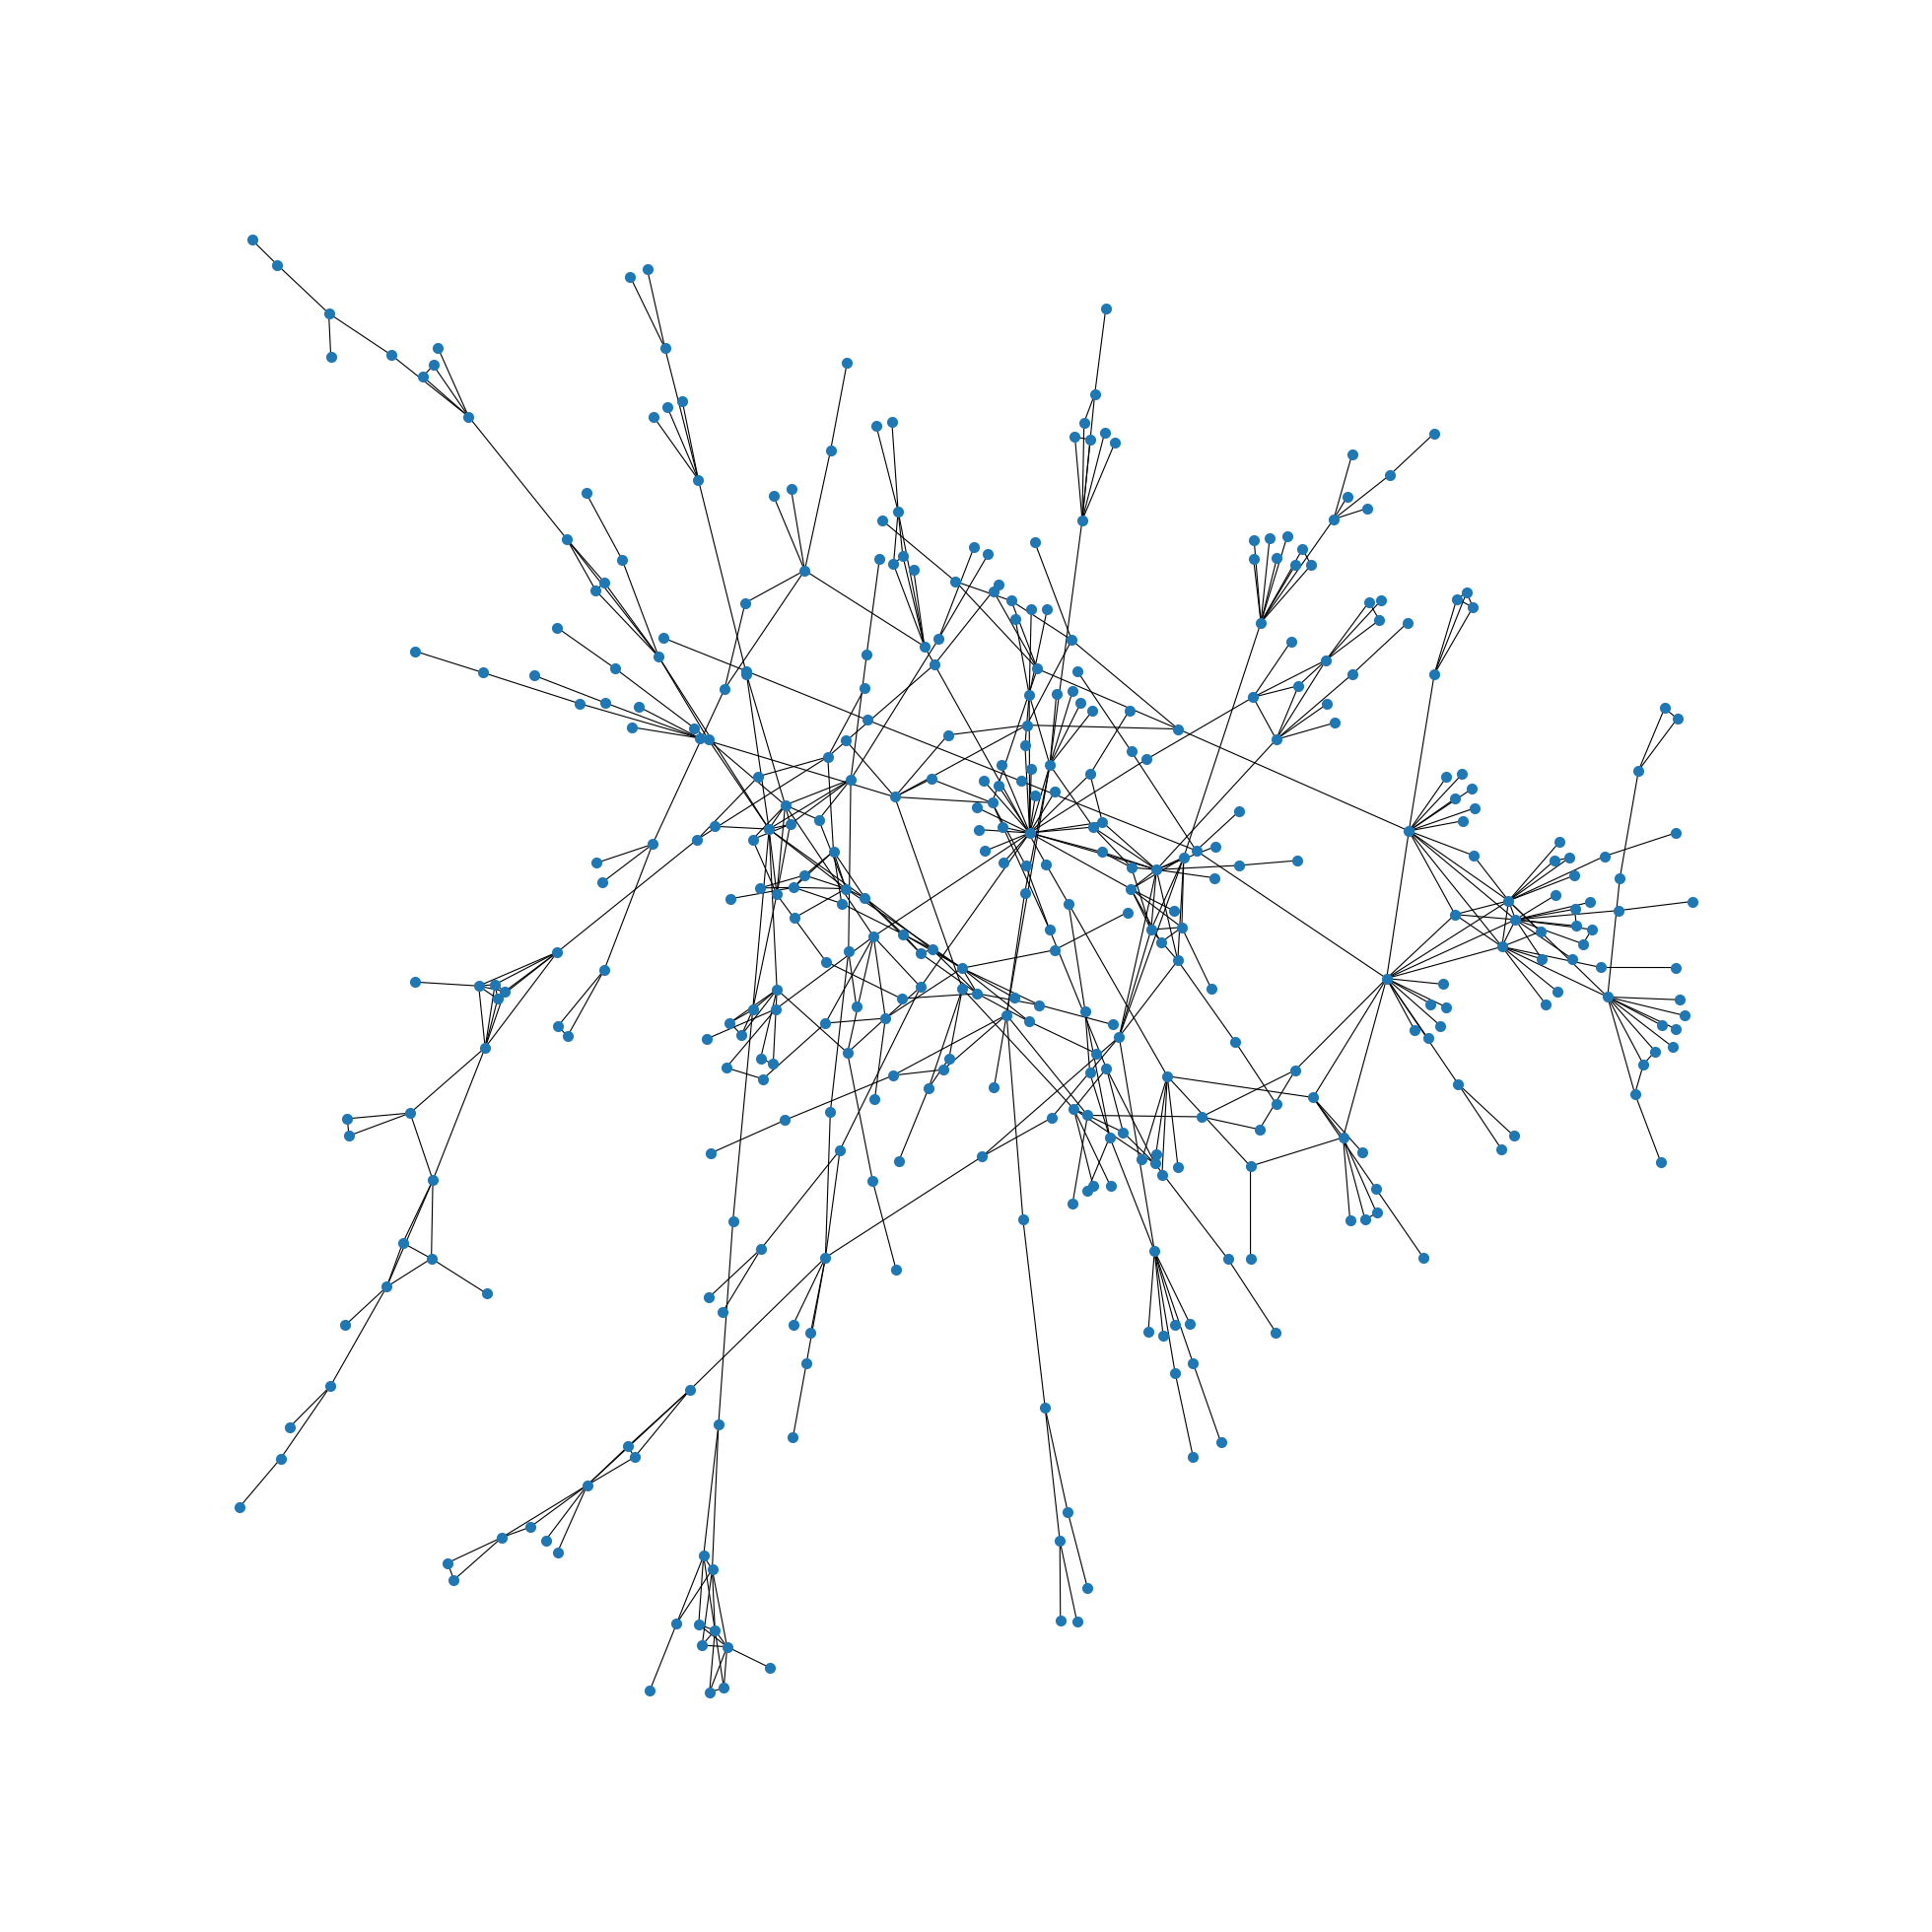

In [12]:
#draw greatest connected component in the network

plt.figure(num=None, figsize=(5, 5), dpi=400)
pos = nx.spring_layout(g.subgraph(Gcc[0])) # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g.subgraph(Gcc[0]), pos, node_size=1)

# edges
nx.draw_networkx_edges(g.subgraph(Gcc[0]), pos, width=0.2)

# .subgraph(Gcc[0])

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [13]:
#betweens centrality in the GCC of the graph - ignore the edges weights
nx.betweenness_centrality(g.subgraph(Gcc[0]))

{'281a67fd770c975ee1a7c842468fb3b5': 0.0,
 '3a3502ecc84a931af1064f5a82ed267a': 0.0,
 '60a8d8f0434c4531bf310eebf9f19cfe': 0.0,
 '642247ccf62585635cefa1bf09f59b94': 0.0,
 '5c9d92777b62444d9fbffe92338d9e21': 0.0,
 '386eebb43722ab502f04f7900bd2451b': 0.005037783375314861,
 '2b939dc9b176d7fa21594d588815d4a4': 0.015037020074803452,
 '372124d6931c4bc48dd0d56075ebee7c': 0.0,
 '7686fe49c98ae1c537b5cc51992f5d20': 0.005037783375314861,
 '7d88b36f73acc7533ca83ecbdebd565f': 0.0,
 '52c80cedd4e90108bf4fa6a206ef6b03': 1.2721675190189045e-05,
 '4c4ac406dc3f4a2e7805e4b578d0fa0a': 0.05401623285754269,
 'b627df9914b9bf141437c51b8a749d35': 0.0,
 '12a3f3a8ef6c5e3c29c88e670fd61ee9': 0.0,
 'b0961721fd839e9982420e807758a2a6': 0.0,
 '1c55a8be0613dd888ed9c039cea3d660': 0.010050123400249345,
 '777d2e438a1b645f3aec9bd57e92672c': 0.0643462331119762,
 '553e0e7590d3116a072507a3635d2877': 0.02504897844948223,
 '1b73aaabcddf5be28fba09916e1ed907': 0.0,
 'c403e106353e1aa40efe783ecb39ed7a': 0.5031804187975473,
 '4025ee582

In [14]:
#betweens centrality in the GCC of the graph - use the edges weights
nx.betweenness_centrality(g.subgraph(Gcc[0]), weight='num_of_carts')

{'281a67fd770c975ee1a7c842468fb3b5': 0.0,
 '3a3502ecc84a931af1064f5a82ed267a': 0.0,
 '60a8d8f0434c4531bf310eebf9f19cfe': 0.0,
 '642247ccf62585635cefa1bf09f59b94': 0.0,
 '5c9d92777b62444d9fbffe92338d9e21': 0.0,
 '386eebb43722ab502f04f7900bd2451b': 0.005037783375314861,
 '2b939dc9b176d7fa21594d588815d4a4': 0.015037020074803452,
 '372124d6931c4bc48dd0d56075ebee7c': 0.0,
 '7686fe49c98ae1c537b5cc51992f5d20': 0.005037783375314861,
 '7d88b36f73acc7533ca83ecbdebd565f': 0.0,
 '52c80cedd4e90108bf4fa6a206ef6b03': 2.544335038037809e-05,
 '4c4ac406dc3f4a2e7805e4b578d0fa0a': 0.05401623285754269,
 'b627df9914b9bf141437c51b8a749d35': 0.0,
 '12a3f3a8ef6c5e3c29c88e670fd61ee9': 0.0,
 'b0961721fd839e9982420e807758a2a6': 0.12264967050861258,
 '1c55a8be0613dd888ed9c039cea3d660': 0.010050123400249345,
 '777d2e438a1b645f3aec9bd57e92672c': 0.0643462331119762,
 '553e0e7590d3116a072507a3635d2877': 0.02504897844948223,
 '1b73aaabcddf5be28fba09916e1ed907': 0.0,
 'c403e106353e1aa40efe783ecb39ed7a': 0.50318041879754

In [15]:
#calculate communities by girvan newman
communities_generator = nx.community.girvan_newman(g.subgraph(Gcc[0]))
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
girvan_newman_comm = sorted(map(sorted, next_level_communities),key=len, reverse=True)

print(f'Num of communities: {girvan_newman_comm}')

Num of communities: [['0615dcf981da53a5ca8777cd6a80361b', '066cc58255ee9ccb3e6da9d3edd02a7e', '06ecc3d4006ad6eb293a1b93ec3c7183', '08056d78bb75ed3ace107c72c16ec511', '09b0d15a8cc9a84e7af7e0225f67dc45', '0b13080e2bf193c4ff096b09e0758c7d', '0bcc3eeca39e1064258aa1e932269894', '0fbf220f61720a67fc0d6432cb32a5b4', '120fa011365fc39efe382cba4e50999e', '14081f2d6a3ce46cfa9d852c9b1b92ba', '181ce2dfd0a0d91969baabcb6df39bb9', '1b7ce992a80ac036dd9ab73d08289712', '1ba4e3fe92f16fd5a8942f7b7d804b52', '1c55a8be0613dd888ed9c039cea3d660', '1ebde342c905182ffc07333fc569c590', '27c0cea4dc76549f5bd124d9cad0ae3b', '281a67fd770c975ee1a7c842468fb3b5', '2ae5ed1d99afbb14a8b24041a81df16b', '2b10e945dae5434075c8bb2be0d17325', '2b939dc9b176d7fa21594d588815d4a4', '2ef36e1cae01b86d0ff0a2f50ff2bd53', '2ff995aead9c63a1f37a07b3664ead37', '322083bacc83416f56c4110e0216c2e1', '349ce46a0e2e20054aa9d80c48af8816', '368c6c730842d78016ad823897a372db', '372645c7439f9661fbbacfd129aa92ec', '3773a3773f5978591cff7b3e614989b3', '386ee

In [16]:
#calculate communities by louvain
louvain_comm = nx.community.louvain_communities(g.subgraph(Gcc[0]), weight='num_of_carts')

print(f'Num of communities: {louvain_comm}')

Num of communities: [{'b10eba910a974df70b8a12d0665cdb9e', 'cf54cbfe4e33bc8f7b34a65da576497c', '71a5f1c2a5fd9889ef26b5ac22aec9c6', '27c0cea4dc76549f5bd124d9cad0ae3b', '90aa2ab699cd0e459be93124aa91c82f', 'c403e106353e1aa40efe783ecb39ed7a', '1ebde342c905182ffc07333fc569c590', '8ee4a65ca0dcdad7f10393ca2788bce5', '8e0be6304c4a94268be42e2d8dfaded9', 'c857b96593773e940454e76efa8eabb3', '181ce2dfd0a0d91969baabcb6df39bb9', '5199c64bddaad759e3cc82d7fa449570', '7650dd3b2dc10798a8cbccc78d9e6e3b', '9fc98e39f04be8e382d8aa5e259f5489', '9a469eaf45dfbc43d39ba1977a3c07af', '72d2aa9f75bba9d406d4c7170d226c6d', 'd9ee0c2943c9663aef6a2bc0411cbc14', 'ce6f74096c84567f22728c84f3d6e7fc', '9dc742d39f778e41ce3a88753f280d40'}, {'ec56aff88e030dcb3b2be22c96ace90a', '2b939dc9b176d7fa21594d588815d4a4', '0fbf220f61720a67fc0d6432cb32a5b4', '87064fd995f81ddb8e735902047fe007', '7a8dfec813ae58cfaa3e1ef9f534adab', '8c591ab0ca519558779df02023177f44', '9fab8bd1f9c69cf2301b8ad3bec47480', '08056d78bb75ed3ace107c72c16ec511', 'c4b

In [17]:
girvan_newman_mod = nx.community.modularity(g.subgraph(Gcc[0]), girvan_newman_comm)
louvain_mod = nx.community.modularity(g.subgraph(Gcc[0]), louvain_comm)

print(f'Modularity by girvan newman communities: {girvan_newman_mod}')
print(f'Modularity by louvain communities: {louvain_mod}')

Modularity by girvan newman communities: 0.642267673078484
Modularity by louvain communities: 0.8676649622595567


# We choose the communities partitions by louvain, because the modularity score is better

In [18]:
print(f'******* Total {len(louvain_comm)} communities ***********')
print('\n')
print('\n')

for com in louvain_comm:
    print(f"******** Community Size: {len(com)} **********")
    print(items_df.loc[items_df['product_id'].isin(com)]['product_category_name_english'].value_counts())
    print(f"************************************")
    print('\n')
    print('\n')

******* Total 21 communities ***********




******** Community Size: 19 **********
bed_bath_table               11
furniture_decor               4
baby                          3
construction_tools_lights     1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 14 **********
garden_tools             4
housewares               2
luggage_accessories      2
cool_stuff               1
bed_bath_table           1
computers_accessories    1
auto                     1
electronics              1
air_conditioning         1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 8 **********
bed_bath_table    8
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 20 **********
bed_bath_table     19
furniture_decor     1
Name: product_category_name_english, dtype: int64
************************************




*

In [19]:
#betweenes centrality inside specific community
nx.betweenness_centrality(g.subgraph(louvain_comm[0]), weight='num_of_carts')

{'b10eba910a974df70b8a12d0665cdb9e': 0.47058823529411764,
 'cf54cbfe4e33bc8f7b34a65da576497c': 0.0,
 '71a5f1c2a5fd9889ef26b5ac22aec9c6': 0.38562091503267976,
 '7650dd3b2dc10798a8cbccc78d9e6e3b': 0.0,
 'd9ee0c2943c9663aef6a2bc0411cbc14': 0.0,
 '27c0cea4dc76549f5bd124d9cad0ae3b': 0.0,
 '90aa2ab699cd0e459be93124aa91c82f': 0.11111111111111112,
 '1ebde342c905182ffc07333fc569c590': 0.21568627450980393,
 'c403e106353e1aa40efe783ecb39ed7a': 0.7581699346405228,
 '8ee4a65ca0dcdad7f10393ca2788bce5': 0.0,
 '8e0be6304c4a94268be42e2d8dfaded9': 0.0,
 'c857b96593773e940454e76efa8eabb3': 0.11111111111111112,
 '181ce2dfd0a0d91969baabcb6df39bb9': 0.0,
 '5199c64bddaad759e3cc82d7fa449570': 0.29411764705882354,
 '9a469eaf45dfbc43d39ba1977a3c07af': 0.0,
 '9fc98e39f04be8e382d8aa5e259f5489': 0.20915032679738563,
 '72d2aa9f75bba9d406d4c7170d226c6d': 0.0,
 'ce6f74096c84567f22728c84f3d6e7fc': 0.46405228758169936,
 '9dc742d39f778e41ce3a88753f280d40': 0.20915032679738563}

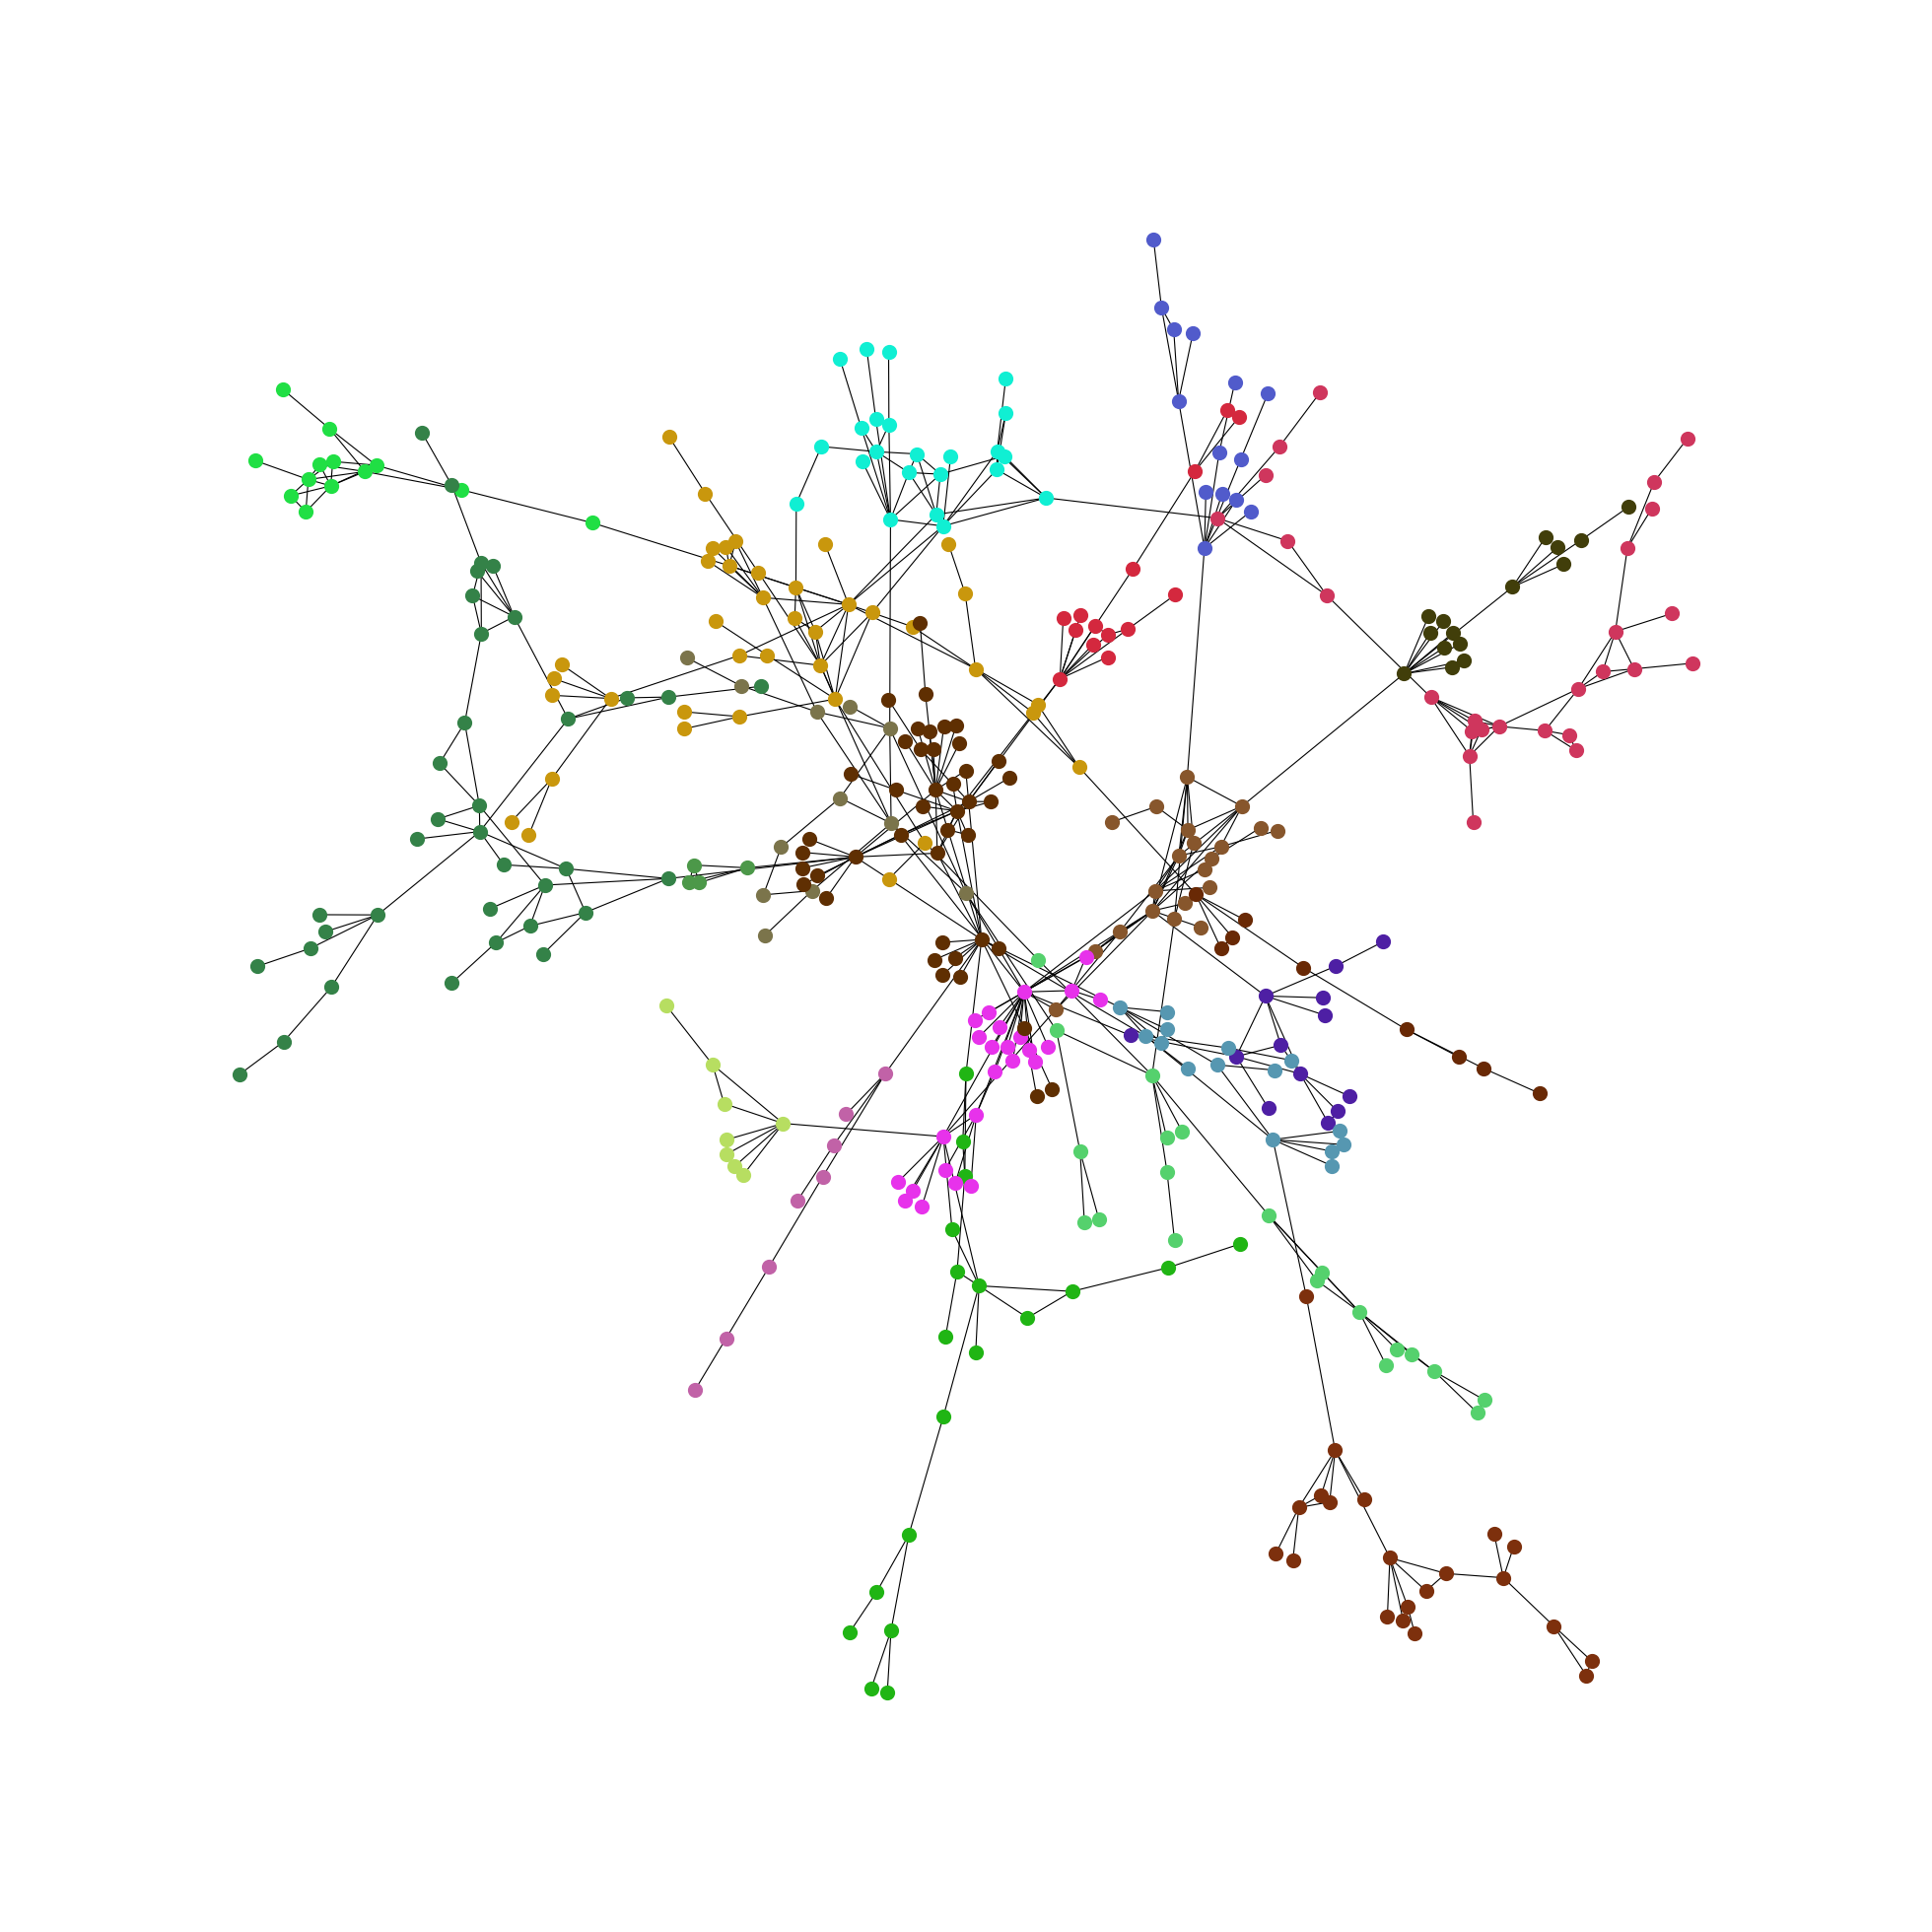

In [20]:
#draw greatest connected component colored by communities in the network

import random


plt.figure(num=None, figsize=(5, 5), dpi=400)
pos = nx.spring_layout(g.subgraph(Gcc[0])) # positions for all nodes - seed for reproducibility

# nodes
for com in louvain_comm:
    r = lambda: random.randint(0,255)
    color = '#%02X%02X%02X' % (r(),r(),r())
    nx.draw_networkx_nodes(g.subgraph(Gcc[0]), pos, node_size=3, nodelist=com, node_color=color)

# edges
nx.draw_networkx_edges(g.subgraph(Gcc[0]), pos, width=0.2)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Recommendation system

In [21]:
def find_node_community(_id, communities):
    for comm in communities:
        if _id in comm:
            return comm

In [24]:
def get_highest_node_betweenes_in_community(_id, g, community, label=None):
    betweenness = nx.betweenness_centrality(g.subgraph(community), weight=label)
    
    sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
    if sorted_betweenness[0][0] == _id:
        return sorted_betweenness[1]
    return sorted_betweenness[0]


In [26]:
def get_max_jaccard_coefficient(_id, ids_to_check):
    jaccard_scores = []
    for id_to_check in ids_to_check:
        if _id != id_to_check:
            jaccard_scores.append(next(nx.jaccard_coefficient(g, [(_id, id_to_check)])))
    
    jaccard_scores = sorted(jaccard_scores, key = lambda x: x[2], reverse=True)
    max_jaccard_id = jaccard_scores[0][1]
    max_jaccard_score = jaccard_scores[0][2]
    
    return (max_jaccard_id, max_jaccard_score)
    

In [27]:
def get_category_by_id(_id):
    return items_df.loc[items_df['product_id'] == _id][['product_category_name_english']].values[0][0]

<h3>Main recommendation function</h3>

In [34]:
def recommendation_data(_id):


    print(f'Product Id: {_id}, category: {get_category_by_id(_id)}\n')


    com = find_node_community(_id, louvain_comm)
    max_betweenes_id, high_betweenes = get_highest_node_betweenes_in_community(_id, g, com, 'num_of_carts')
    print(f'Max betweenes id: {max_betweenes_id}, score: {round(high_betweenes, 2)}, category: {get_category_by_id(max_betweenes_id)}')


    max_jaccard_id_by_community, high_jaccard_by_community = get_max_jaccard_coefficient(_id, com)
    print(f'Max jaccard by community id: {max_jaccard_id_by_community}, score: {round(high_jaccard_by_community,2)}, category: {get_category_by_id(max_jaccard_id_by_community)}')

    
    max_jaccard_id_by_gcc, high_jaccard_by_gcc = get_max_jaccard_coefficient(_id, Gcc[0])
    print(f'Max jaccard by gcc id: {max_jaccard_id_by_gcc}, score: {round(high_jaccard_by_gcc,2)}, category: {get_category_by_id(max_jaccard_id_by_gcc)}')
    
    
    return(set({max_betweenes_id, max_jaccard_id_by_community, max_jaccard_id_by_gcc}))


# User input for recommendation system

In [40]:
recommendation_results = recommendation_data('eebbed5ed3b134eceb717496c47652ba')

print(f'\nRecommended items: {recommendation_results}')

Product Id: eebbed5ed3b134eceb717496c47652ba, category: bed_bath_table

Max betweenes id: 99a4788cb24856965c36a24e339b6058, score: 0.83, category: bed_bath_table
Max jaccard by community id: 3458b4c1fcbe46e2eedb48e00960a60e, score: 0.33, category: bed_bath_table
Max jaccard by gcc id: 4f88323d03ffaf090b8fb0116b33c95e, score: 0.5, category: bed_bath_table

Recommended items: {'4f88323d03ffaf090b8fb0116b33c95e', '3458b4c1fcbe46e2eedb48e00960a60e', '99a4788cb24856965c36a24e339b6058'}
